In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from numpy import random
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pandas import Series
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller

import math





In [4]:
from __future__ import print_function
import os
import sys
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları/Auto Correlation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

In [5]:
Product=841850
Productname=Product
Exp_Country='CHN' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [6]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
Y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]

dependent_variable=Y.dropna().values

# GRID ARIMA SEARCH

In [7]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from scipy.stats.stats import pearsonr
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE


In [8]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    R2=int(1000*pearsonr(test, predictions )[0]**2)/1000
    return rmse,R2,test,predictions

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score = float("inf")
    best_cfg = float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)[0]
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        
                        result = evaluate_arima_model(dataset, order)
                        best_R2,best_test,best_predictions = result[1],result[2],result[3]
                        
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f R2=%.3f' % (best_cfg, best_score, best_R2))
    return best_cfg,best_score, best_R2,best_test,best_predictions


In [9]:
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 12)

In [10]:
series = dependent_variable
warnings.filterwarnings("ignore")
model_result=evaluate_models(series, p_values, d_values, q_values)
best_cfg=model_result[0]
best_score=model_result[1]
best_r2=model_result[2]
best_test=model_result[3]
best_prediction=model_result[4]

ARIMA(0, 0, 1) RMSE=1918.463
ARIMA(0, 0, 2) RMSE=1517.744
ARIMA(0, 0, 3) RMSE=1288.632
ARIMA(0, 0, 4) RMSE=1280.227
ARIMA(0, 0, 5) RMSE=1055.947
ARIMA(0, 0, 6) RMSE=1044.112
ARIMA(1, 0, 0) RMSE=868.247
ARIMA(2, 0, 0) RMSE=787.299
ARIMA(3, 0, 0) RMSE=777.943
Best ARIMA(3, 0, 0) RMSE=777.943 R2=0.338


In [11]:
result_set= [best_cfg[0],best_cfg[1],best_cfg[2],best_score,best_r2]
Arima_results=  DataFrame(columns='p d g score r2'.split())
Arima_results.loc[0]= result_set

In [12]:
writer = pd.ExcelWriter('Plots_ARIMA/ARIMA_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
Arima_results.to_excel(writer,'Results')
writer.save()

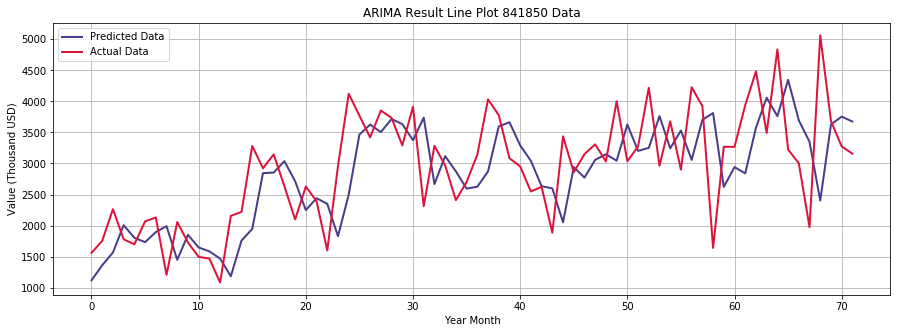

In [13]:

Y=best_test
fig = plt.figure(figsize=(15, 5))

ax = plt.axes()

xi = [i for i in range(0, len(Y))]


ax.plot(xi, best_prediction, lw=2, color='darkslateblue',label='Predicted Data')
ax.plot(xi, best_test, lw=2, color='crimson', label='Actual Data')


ax.grid(True)

ax.legend(frameon=True)
plt.title("ARIMA Result Line Plot {} Data".format(Productname))
plt.xlabel('Year Month')
plt.ylabel('Value (Thousand USD)') 
plt.savefig('Plots_ARIMA/ARIMA Plot {}_{}_{}.png'.format(Exp_Country,Imp_Country,Productname))

